<a href="https://colab.research.google.com/github/pd05849/Machine_Learning_Engineering/blob/main/HMW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pol del Castillo
# RIN: 662116017

# QUESTION 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


CIFAR-10 CNN CLASSIFICATION

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image dimensions: 32 x 32 x 3
Number of classes: 10



Pixel values normalized to [0, 1]

Visualizing sample images from each class...


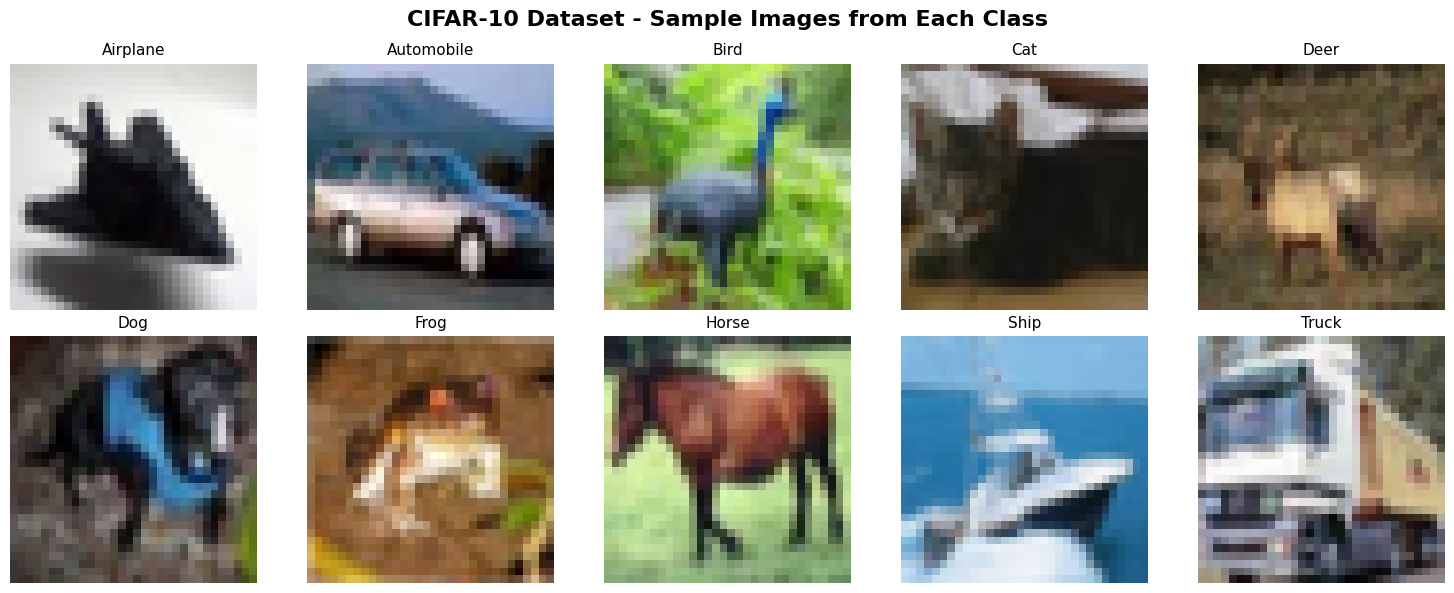

In [2]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('CIFAR-10 Dataset - Sample Images from Each Class', fontsize=16, fontweight='bold')

for i in range(10):
    idx = np.where(y_train == i)[0][0]
    ax = axes[i // 5, i % 5]
    ax.imshow(x_train[idx])
    ax.set_title(f'{class_names[i]}', fontsize=11)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
model = models.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3),
                  padding='same', name='conv2d_1'),

    layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_2'),

    layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2d_3'),

    layers.Flatten(name='flatten'),

    layers.Dense(64, activation='relu', name='dense_1'),

    layers.Dense(10, activation='softmax', name='output')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model Architecture:
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,362 (642.04 KB)

 Non-trainable params: 0 (0.00 B)


COMPILING THE MODEL
Model compiled successfully!
Optimizer: Adam
Loss function: Sparse Categorical Crossentropy
Metrics: Accuracy


In [4]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)


TRAINING THE MODEL
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 111ms/step - accuracy: 0.3493 - loss: 1.7807 - val_accuracy: 0.5330 - val_loss: 1.3109
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 109ms/step - accuracy: 0.5661 - loss: 1.2214 - val_accuracy: 0.6042 - val_loss: 1.0957
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 107ms/step - accuracy: 0.6437 - loss: 1.0085 - val_accuracy: 0.6548 - val_loss: 0.9824
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 110ms/step - accuracy: 0.6910 - loss: 0.8811 - val_accuracy: 0.6770 - val_loss: 0.9327
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.7217 - loss: 0.7982 - val_accuracy: 0.6769 - val_loss: 0.9325
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 113ms/step - accuracy: 0.7446 - loss: 0.7276 - val_accuracy: 0.6858 - val_loss: 0.9163
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.7609 - loss: 0.6744 - val_accuracy: 0.6896 - val_loss: 0.9024
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 109ms/step - a

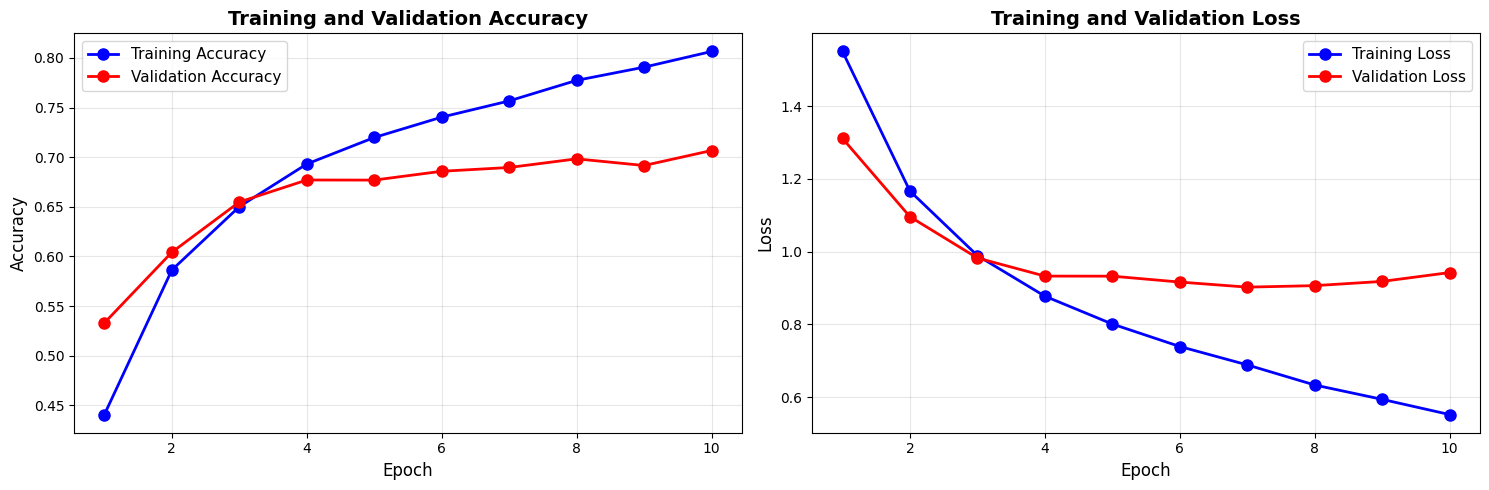


Final Training Accuracy: 0.8065
Final Validation Accuracy: 0.7067
Final Test Accuracy: 0.7067
Final Test Loss: 0.9424


In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

epochs_range = range(1, len(history.history['accuracy']) + 1)

ax1.plot(epochs_range, history.history['accuracy'], 'bo-',
         label='Training Accuracy', linewidth=2, markersize=8)
ax1.plot(epochs_range, history.history['val_accuracy'], 'ro-',
         label='Validation Accuracy', linewidth=2, markersize=8)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax2.plot(epochs_range, history.history['loss'], 'bo-',
         label='Training Loss', linewidth=2, markersize=8)
ax2.plot(epochs_range, history.history['val_loss'], 'ro-',
         label='Validation Loss', linewidth=2, markersize=8)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

# QUESTION 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(data.feature_names)}")
print(f"\nTarget classes:")
print(f"  0 = Malignant (cancerous)")
print(f"  1 = Benign (non-cancerous)")

print("\nAll available features:")
for i, feature in enumerate(data.feature_names):
    print(f"  {i+1}. {feature}")

required_features = ['worst compactness', 'worst concavity', 'worst area']
X = df[required_features].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Dataset shape: (569, 31)
Number of samples: 569
Number of features: 30

Target classes:
  0 = Malignant (cancerous)
  1 = Benign (non-cancerous)

All available features:
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension
  11. radius error
  12. texture error
  13. perimeter error
  14. area error
  15. smoothness error
  16. compactness error
  17. concavity error
  18. concave points error
  19. symmetry error
  20. fractal dimension error
  21. worst radius
  22. worst texture
  23. worst perimeter
  24. worst area
  25. worst smoothness
  26. worst compactness
  27. worst concavity
  28. worst concave points
  29. worst symmetry
  30. worst fractal dimension


In [12]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"\n(a) ACCURACY WITH LINEAR KERNEL: {accuracy_linear:.4f} ({accuracy_linear*100:.2f}%)")

print(classification_report(y_test, y_pred_linear,
                          target_names=['Malignant', 'Benign']))

print("Confusion Matrix (Linear Kernel):")
print(f"  True Negatives (Malignant correctly classified): {cm_linear[0,0]}")
print(f"  False Positives (Malignant misclassified as Benign): {cm_linear[0,1]}")
print(f"  False Negatives (Benign misclassified as Malignant): {cm_linear[1,0]}")
print(f"  True Positives (Benign correctly classified): {cm_linear[1,1]}")


(a) ACCURACY WITH LINEAR KERNEL: 0.9123 (91.23%)

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

   Malignant       0.89      0.88      0.88        64
      Benign       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171

Confusion Matrix (Linear Kernel):
  True Negatives (Malignant correctly classified): 56
  False Positives (Malignant misclassified as Benign): 8
  False Negatives (Benign misclassified as Malignant): 7
  True Positives (Benign correctly classified): 100


In [13]:
svm_rbf = SVC(kernel='rbf', C=2, random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"\n(b) ACCURACY WITH RBF KERNEL (C=2): {accuracy_rbf:.4f} ({accuracy_rbf*100:.2f}%)")

print(classification_report(y_test, y_pred_rbf,
                          target_names=['Malignant', 'Benign']))



(b) ACCURACY WITH RBF KERNEL (C=2): 0.9240 (92.40%)
              precision    recall  f1-score   support

   Malignant       0.95      0.84      0.89        64
      Benign       0.91      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [14]:
print(f"\n{'Model':<30} {'Accuracy':<15} {'Accuracy %':<15}")
print("-"*60)
print(f"{'(a) Linear Kernel':<30} {accuracy_linear:.4f}         {accuracy_linear*100:.2f}%")
print(f"{'(b) RBF Kernel (C=2)':<30} {accuracy_rbf:.4f}         {accuracy_rbf*100:.2f}%")
print("-"*60)

if accuracy_rbf > accuracy_linear:
    print(f"\nRBF kernel performs better by {(accuracy_rbf - accuracy_linear)*100:.2f}%")
elif accuracy_linear > accuracy_rbf:
    print(f"\nLinear kernel performs better by {(accuracy_linear - accuracy_rbf)*100:.2f}%")
else:
    print("\nBoth kernels perform equally well")


Model                          Accuracy        Accuracy %     
------------------------------------------------------------
(a) Linear Kernel              0.9123         91.23%
(b) RBF Kernel (C=2)           0.9240         92.40%
------------------------------------------------------------

RBF kernel performs better by 1.17%
